In [1]:
!nvidia-smi

Thu May 19 12:55:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-05-19 12:56:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-05-19 12:56:18 (44.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, walk_through_dir, unzip_data

In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-05-19 12:57:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   196MB/s    in 0.8s    

2022-05-19 12:57:42 (196 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
unzip_data("10_food_classes_10_percent.zip")

In [7]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [8]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [9]:
img_size = (224, 224)
batch_size = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                            label_mode="categorical",
                                                                            image_size=img_size,
                                                                            batch_size=batch_size)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=img_size,
                                                                batch_size=batch_size)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [12]:
# 1
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2
base_model.trainable = False

# 3
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4
# no need to rescale => skip

# 5
x = base_model(inputs)
print(f"Inputs after passing through base_model: {x.shape}")

# 6
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8
model_0 = tf.keras.Model(inputs, outputs)

# 9
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 10
history_0 = model_0.fit(train_data_10_percent,
                        epochs=10,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="base_model")])

Inputs after passing through base_model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/base_model/20220519-131328
Epoch 1/10
24/24 [==============================] - 32s 469ms/step - loss: 1.9996 - accuracy: 0.3320 - val_loss: 1.4281 - val_accuracy: 0.6974
Epoch 2/10
24/24 [==============================] - 7s 267ms/step - loss: 1.2035 - accuracy: 0.7360 - val_loss: 0.9880 - val_accuracy: 0.8109
Epoch 3/10
24/24 [==============================] - 7s 267ms/step - loss: 0.8677 - accuracy: 0.7960 - val_loss: 0.7837 - val_accuracy: 0.8421
Epoch 4/10
24/24 [==============================] - 7s 267ms/step - loss: 0.7101 - accuracy: 0.8347 - val_loss: 0.7174 - val_accuracy: 0.8405
Epoch 5/10
24/24 [==============================] - 7s 273ms/step - loss: 0.6133 - accuracy: 0.8520 - val_loss: 0.6199 - val_accuracy: 0.8618
Epoch 6/10
24/24 [==============================] - 7s 269ms/step - loss: 0.5280 - accuracy: 0.8893 - 

In [13]:
model_0.evaluate(test_data)

79/79 [==============================] - 12s 139ms/step - loss: 0.5025 - accuracy: 0.8544


[0.5025030970573425, 0.8543999791145325]

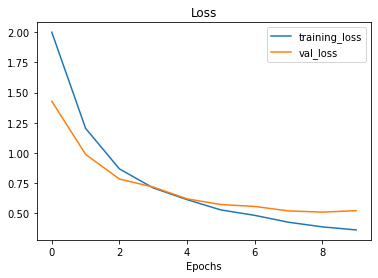

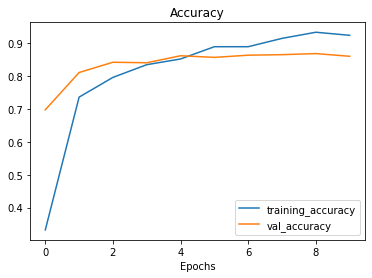

In [14]:
plot_loss_curves(history_0)